Dataset preview:
   Age  Annual_Income  Spending_Score  Gender
0   56          73053              58       0
1   69          36959              67       1
2   46          20530              46       1
3   32         109856              24       1
4   60          18748              32       0


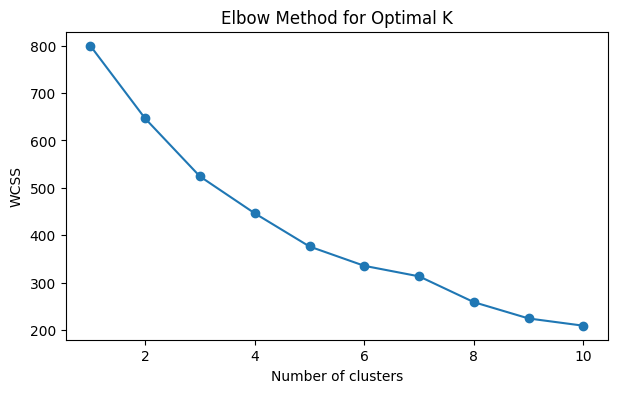


Clustered Data:
   Age  Annual_Income  Spending_Score  Gender  Cluster
0   56          73053              58       0        0
1   69          36959              67       1        1
2   46          20530              46       1        1
3   32         109856              24       1        2
4   60          18748              32       0        3


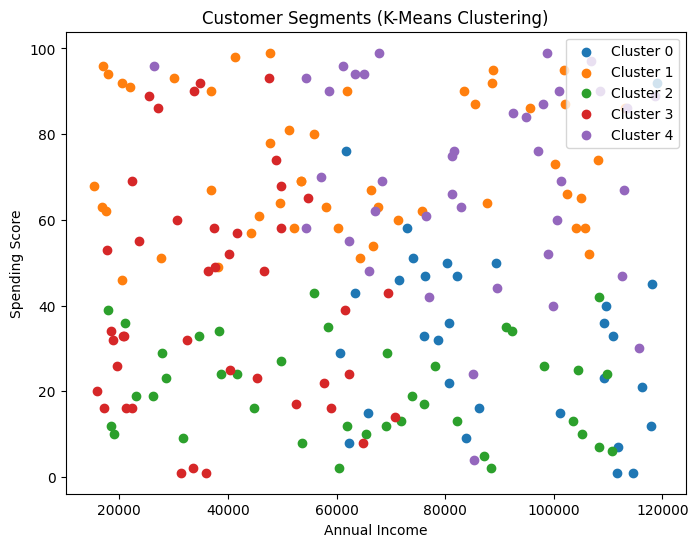

In [2]:
# ---------------------------------------------
# 1) Import libraries
# ---------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ---------------------------------------------
# 2) Create a synthetic Market Segmentation dataset
# (Similar to Mall Customers dataset)
# ---------------------------------------------
np.random.seed(42)

n = 200

data = {
    "Age": np.random.randint(18, 70, n),
    "Annual_Income": np.random.randint(15000, 120000, n),
    "Spending_Score": np.random.randint(1, 100, n),
    "Gender": np.random.choice(["Male", "Female"], n)
}

df = pd.DataFrame(data)

# Encode Gender
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

print("Dataset preview:")
print(df.head())

# ---------------------------------------------
# 3) Select Features
# ---------------------------------------------
X = df[["Age", "Annual_Income", "Spending_Score", "Gender"]]

# ---------------------------------------------
# 4) Feature Scaling
# ---------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------
# 5) Elbow Method to find optimal clusters
# ---------------------------------------------
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# ---------------------------------------------
# 6) Apply K-Means (choose K = 5 suggested by elbow)
# ---------------------------------------------
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters

print("\nClustered Data:")
print(df.head())

# ---------------------------------------------
# 7) Visualizing clusters (Income vs Spending Score)
# ---------------------------------------------
plt.figure(figsize=(8, 6))

for c in range(k):
    plt.scatter(
        df[df.Cluster == c]["Annual_Income"],
        df[df.Cluster == c]["Spending_Score"],
        label=f"Cluster {c}"
    )

plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()
